In [3]:
import pandas as pd
import datetime
import gensim
from gensim.utils import simple_preprocess
from gensim.parsing.preprocessing import STOPWORDS
from nltk.stem import WordNetLemmatizer, SnowballStemmer
from nltk.stem.porter import *
import numpy as np
np.random.seed(400)
from nltk import PorterStemmer
PorterStemmer().stem('complications')
import matplotlib.pyplot as plt
import seaborn as sns

In [4]:
import nltk
nltk.download('wordnet')

[nltk_data] Downloading package wordnet to C:\Users\Taruna
[nltk_data]     Garg\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


True

In [5]:
pulwama = pd.read_csv("pulwama1.csv")
pulwama.head()

,datetime,headlines,summary,article,url
0,2019-02-08T00:00:00+05:30,Opening gates to North East Indian craftsmanship…,NaN,“I go to melas with my Mom during vacation and...,https://timesofindia.indiatimes.com/city/indor...
1,2019-02-04T00:00:00+05:30,Is your cool hashtag-friendly lifestyle leadin...,NaN,"Yes, it is easy to go out and devour junk food...",https://timesofindia.indiatimes.com/city/benga...
2,2019-02-04T00:33:41+05:30,"ISL: Others have more pressure, says FC Goa co...",NaN,The race for the playoff spot in the Indian Su...,https://timesofindia.indiatimes.com/city/goa/i...
3,2019-02-04T14:58:32+05:30,"Congress can learn a lot from Babulal Gaur, sa...",NaN,"Bhopal: Former chief minister Babulal Gaur , w...",https://timesofindia.indiatimes.com/city/bhopa...
4,2019-02-10T00:49:22+05:30,Don’t believe the label: FSSAI to set rules fo...,NaN,NEW DELHI: The food safety and standards autho...,https://timesofindia.indiatimes.com/city/delhi...


In [6]:
pulwama.shape

(17850, 5)

In [7]:
pulwama = pulwama.drop(['summary', 'url'], axis=1)
pulwama.head()

,datetime,headlines,article
0,2019-02-08T00:00:00+05:30,Opening gates to North East Indian craftsmanship…,“I go to melas with my Mom during vacation and...
1,2019-02-04T00:00:00+05:30,Is your cool hashtag-friendly lifestyle leadin...,"Yes, it is easy to go out and devour junk food..."
2,2019-02-04T00:33:41+05:30,"ISL: Others have more pressure, says FC Goa co...",The race for the playoff spot in the Indian Su...
3,2019-02-04T14:58:32+05:30,"Congress can learn a lot from Babulal Gaur, sa...","Bhopal: Former chief minister Babulal Gaur , w..."
4,2019-02-10T00:49:22+05:30,Don’t believe the label: FSSAI to set rules fo...,NEW DELHI: The food safety and standards autho...


In [8]:
pulwama = pulwama.dropna(how='any')
pulwama.shape

(17596, 3)

In [9]:
l = []

for i in pulwama['datetime']:
    i = i.replace(i[10:],'')
    l.append(i)
    
pulwama['datetime'] = l
pulwama.head()

,datetime,headlines,article
0,2019-02-08,Opening gates to North East Indian craftsmanship…,“I go to melas with my Mom during vacation and...
1,2019-02-04,Is your cool hashtag-friendly lifestyle leadin...,"Yes, it is easy to go out and devour junk food..."
2,2019-02-04,"ISL: Others have more pressure, says FC Goa co...",The race for the playoff spot in the Indian Su...
3,2019-02-04,"Congress can learn a lot from Babulal Gaur, sa...","Bhopal: Former chief minister Babulal Gaur , w..."
4,2019-02-10,Don’t believe the label: FSSAI to set rules fo...,NEW DELHI: The food safety and standards autho...


In [10]:
pulwama = pulwama.rename(index=str, columns={"datetime": "date"})
pulwama = pulwama.sort_values(by='date',ascending=True)
pulwama_clean = pulwama.reset_index()
pulwama_clean.head()

,index,date,headlines,article
0,8961,2019-02-01,Inmate next to your hostel room could be a cri...,LUCKNOW: Worried that their children could be ...
1,8645,2019-02-01,Heavily water polluted area survey findings ro...,CHANDIGARH: The recent findings of a survey by...
2,11205,2019-02-01,"H1N1: DMHOs to inspect wards, panel to manage ...",Hyderabad: Anticipating further increase in th...
3,8646,2019-02-01,With Jind result story,Mismatch of EVMs In the eighth round of counti...
4,8647,2019-02-01,No 200 free power units for I-T payers,CHANDIGARH: In the run-up to the Lok Sabha pol...


In [79]:
pulwama_final = pulwama_clean.drop(['index'], axis=1)
pulwama_final.head()

,date,headlines,article
0,2019-02-01,Inmate next to your hostel room could be a cri...,LUCKNOW: Worried that their children could be ...
1,2019-02-01,Heavily water polluted area survey findings ro...,CHANDIGARH: The recent findings of a survey by...
2,2019-02-01,"H1N1: DMHOs to inspect wards, panel to manage ...",Hyderabad: Anticipating further increase in th...
3,2019-02-01,With Jind result story,Mismatch of EVMs In the eighth round of counti...
4,2019-02-01,No 200 free power units for I-T payers,CHANDIGARH: In the run-up to the Lok Sabha pol...


In [12]:
pulwama_final = pulwama_final.drop(pulwama_final.index[17577:17596])
pulwama_final.tail()

,date,headlines,article
17572,2019-03-19,Last day to get flat 50% off on food & drinks ...,The Great Indian Restaurant Festival is going ...
17573,2019-03-30,Best security cameras for homes and offices,It is always good to be cautious about your su...
17574,2019-03-31,Western railways rolls out tech to track phone...,MUMBAI: For the first time for Indian Railways...
17575,2019-04-04,Astitva to the fore at 2-day Times Litfest,BENGALURU: The fifth edition of the two-day Ti...
17576,2019-04-10,"Will visit every farmer’s home, says BSP’s Sat...",NOIDA: Satveer Nagar promises to visit every f...


In [13]:
stemmer = PorterStemmer()
def lemmatize_stemming(text):
    return stemmer.stem(WordNetLemmatizer().lemmatize(text, pos='v'))
def preprocess(text):
    result = []
    for token in gensim.utils.simple_preprocess(text):
        if token not in gensim.parsing.preprocessing.STOPWORDS and len(token) > 3:
            result.append(lemmatize_stemming(token))
    return result

In [14]:
headlines = pulwama_final['headlines'].astype(str).map(preprocess)
articles = pulwama_final['article'].astype(str).map(preprocess)

In [15]:
pulwama_final['headlines'] = headlines
pulwama_final['article'] = articles
pulwama_final.head()

,date,headlines,article
0,2019-02-01,"[inmat, hostel, room, crimin]","[lucknow, worri, children, stay, crimin, luckn..."
1,2019-02-01,"[heavili, water, pollut, area, survey, find, r...","[chandigarh, recent, find, survey, punjab, hea..."
2,2019-02-01,"[dmho, inspect, ward, panel, manag, case]","[hyderabad, anticip, increas, number, swine, c..."
3,2019-02-01,"[jind, result, stori]","[mismatch, evm, eighth, round, count, poll, ag..."
4,2019-02-01,"[free, power, unit, payer]","[chandigarh, sabha, poll, punjab, govern, thur..."


In [16]:
l = []

for word in pulwama_final['article']:
    if 'pakistan' in word:
        l.append('1')
    else:
        l.append('0')
        
pulwama_final['Pakistan'] = l


In [17]:
l = []

for word in pulwama_final['article']:
    if 'kashmir' in word:
        l.append('1')
    else:
        l.append('0')
        
pulwama_final['Kashmir'] = l

In [18]:
l = []

for word in pulwama_final['article']:
    if 'attack' in word:
        l.append('1')
    else:
        l.append('0')
        
pulwama_final['Attack'] = l

In [19]:
l = []

for word in pulwama_final['article']:
    if 'terror' in word:
        l.append('1')
    else:
        l.append('0')
        
pulwama_final['Terror'] = l

In [20]:
l = []

for word in pulwama_final['article']:
    if 'pulwama' in word:
        l.append('1')
    else:
        l.append('0')
        
pulwama_final['Pulwama'] = l
pulwama_final['Pulwama'].value_counts()

0    16837
1      740
Name: Pulwama, dtype: int64

In [21]:
l = []

for word in pulwama_final['article']:
    if 'terror' in word:
        l.append('1')
    else:
        l.append('0')
        
pulwama_final['Terror'] = l
pulwama_final['Terror'].value_counts()

0    16868
1      709
Name: Terror, dtype: int64

In [32]:
l = []

for i in pulwama_final['article']:
    if('pakistan' in i or 'kashmir' in i or 'attack' in i or 'terror' in i or 'pulwama' in i or 'crpf' in i):
        l.append('1')
    else:
        l.append('0')
        
pulwama_final['Relevant'] = l

In [33]:
pulwama_final.head()

,date,headlines,article,Pakistan,Kashmir,Attack,Terror,Pulwama,Relevant,CRPF
0,2019-02-01,"[inmat, hostel, room, crimin]","[lucknow, worri, children, stay, crimin, luckn...",0,0,0,0,0,0,0
1,2019-02-01,"[heavili, water, pollut, area, survey, find, r...","[chandigarh, recent, find, survey, punjab, hea...",0,0,0,0,0,0,0
2,2019-02-01,"[dmho, inspect, ward, panel, manag, case]","[hyderabad, anticip, increas, number, swine, c...",0,0,0,0,0,0,0
3,2019-02-01,"[jind, result, stori]","[mismatch, evm, eighth, round, count, poll, ag...",0,0,0,0,0,0,0
4,2019-02-01,"[free, power, unit, payer]","[chandigarh, sabha, poll, punjab, govern, thur...",0,0,0,0,0,0,0


In [34]:
l = []

for word in pulwama_final['article']:
    if 'crpf' in word:
        l.append('1')
    else:
        l.append('0')
        
pulwama_final['CRPF'] = l
pulwama_final['CRPF'].value_counts()

0    17084
1      493
Name: CRPF, dtype: int64

In [35]:
pulwama_final.head()

,date,headlines,article,Pakistan,Kashmir,Attack,Terror,Pulwama,Relevant,CRPF
0,2019-02-01,"[inmat, hostel, room, crimin]","[lucknow, worri, children, stay, crimin, luckn...",0,0,0,0,0,0,0
1,2019-02-01,"[heavili, water, pollut, area, survey, find, r...","[chandigarh, recent, find, survey, punjab, hea...",0,0,0,0,0,0,0
2,2019-02-01,"[dmho, inspect, ward, panel, manag, case]","[hyderabad, anticip, increas, number, swine, c...",0,0,0,0,0,0,0
3,2019-02-01,"[jind, result, stori]","[mismatch, evm, eighth, round, count, poll, ag...",0,0,0,0,0,0,0
4,2019-02-01,"[free, power, unit, payer]","[chandigarh, sabha, poll, punjab, govern, thur...",0,0,0,0,0,0,0


In [36]:
pulwama_final['Pulwama'].value_counts()

0    16837
1      740
Name: Pulwama, dtype: int64

In [37]:
pulwama_old = pulwama_final[:7585]
pulwama_old.head()

,date,headlines,article,Pakistan,Kashmir,Attack,Terror,Pulwama,Relevant,CRPF
0,2019-02-01,"[inmat, hostel, room, crimin]","[lucknow, worri, children, stay, crimin, luckn...",0,0,0,0,0,0,0
1,2019-02-01,"[heavili, water, pollut, area, survey, find, r...","[chandigarh, recent, find, survey, punjab, hea...",0,0,0,0,0,0,0
2,2019-02-01,"[dmho, inspect, ward, panel, manag, case]","[hyderabad, anticip, increas, number, swine, c...",0,0,0,0,0,0,0
3,2019-02-01,"[jind, result, stori]","[mismatch, evm, eighth, round, count, poll, ag...",0,0,0,0,0,0,0
4,2019-02-01,"[free, power, unit, payer]","[chandigarh, sabha, poll, punjab, govern, thur...",0,0,0,0,0,0,0


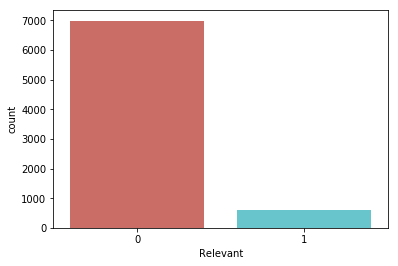

In [38]:
sns.countplot(x="Relevant", data=pulwama_old, palette='hls')
plt.show()

In [39]:
pulwama_new = pulwama_final[7585:]
pulwama_new.head()

,date,headlines,article,Pakistan,Kashmir,Attack,Terror,Pulwama,Relevant,CRPF
7585,2019-02-14,"[woman, arrest, rap, minor]","[malappuram, tenhipalam, polic, arrest, year, ...",0,0,0,0,0,0,0
7586,2019-02-14,"[oper, lotu, fail, bloom, dissid, karnataka, m...","[bengaluru, hassan, day, chief, minist, kumara...",0,0,1,0,0,1,0
7587,2019-02-14,"[oper, lotu, fail, bloom, dissid, karnataka, m...","[bengaluru, hassan, day, chief, minist, kumara...",0,0,1,0,0,1,0
7588,2019-02-14,"[encroach, free, rein, munnar]","[idukki, illeg, construct, encroach, munnar, g...",0,0,0,0,0,0,0
7589,2019-02-14,"[rafal, maker, train, student, tamil, nadu]","[chennai, creat, skill, workforc, aviat, secto...",0,0,0,0,0,0,0


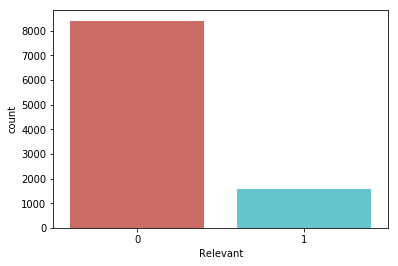

In [40]:
sns.countplot(x="Relevant", data=pulwama_new, palette='hls')
plt.show()


In [65]:
pulwama_old_data = pulwama_old[['Pakistan', 'Kashmir','Terror','Attack', 'Pulwama', 'CRPF']]


l = []

for word in pulwama_old_data:
        l.append(pulwama_old_data[word].value_counts()[1])
        
Total_no= l

list1 = []

for word in pulwama_old_data:
        list1.append(pulwama_old_data[word].value_counts()[1]*100/(pulwama_old_data[word].value_counts()[1] + pulwama_old_data[word].value_counts()[0]))

Percentage = list1

keywords = ['Pakistan', 'Kashmir','Terror','Attack','Pulwama', 'CRPF']
b = {'Keywords':keywords,'Total_no':Total_no,'Percentage':Percentage}
data_old = pd.DataFrame(b)
data_old

,Keywords,Total_no,Percentage
0,Pakistan,75,0.988794
1,Kashmir,65,0.856955
2,Terror,46,0.606460
3,Attack,431,5.682268
4,Pulwama,4,0.052736
5,CRPF,30,0.395517


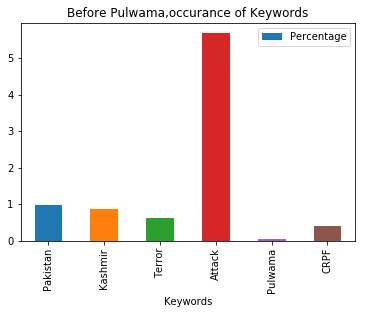

In [66]:
ax = data_old.plot(x='Keywords', y='Percentage', kind='bar', title='Before Pulwama,occurance of Keywords')


    
plt.show()

In [69]:
pulwama_new_data = pulwama_new[['Pakistan', 'Kashmir','Terror','Attack','Pulwama', 'CRPF']]

l = []

for word in pulwama_new_data:
        l.append(pulwama_new_data[word].value_counts()[1])
        
Total_no= l 

list2 = []

for word in pulwama_new_data:
        list2.append(pulwama_new_data[word].value_counts()[1]*100/(pulwama_new_data[word].value_counts()[1] + pulwama_new_data[word].value_counts()[0]))

Percentage = list2

keywords = ['Pakistan', 'Kashmir','Terror','Attack','Pulwama', 'CRPF']
d = {'Keywords':keywords,'Total_no':Total_no,'Percentage':Percentage}
data_new = pd.DataFrame(d)
data_new

,Keywords,Total_no,Percentage
0,Pakistan,650,6.505204
1,Kashmir,477,4.773819
2,Terror,663,6.635308
3,Attack,1129,11.299039
4,Pulwama,736,7.365893
5,CRPF,463,4.633707


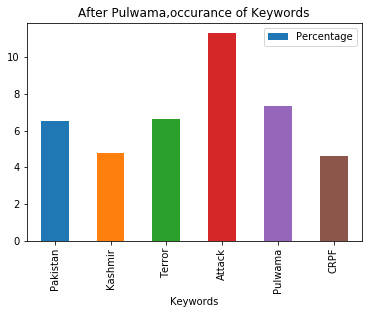

In [70]:
data_new.plot(x='Keywords', y='Percentage', kind='bar', title= 'After Pulwama,occurance of Keywords')
plt.show()


In [72]:
l = []

for words in pulwama_clean['article'][8212:8214]:
    l.append(words)
    
wordes = words

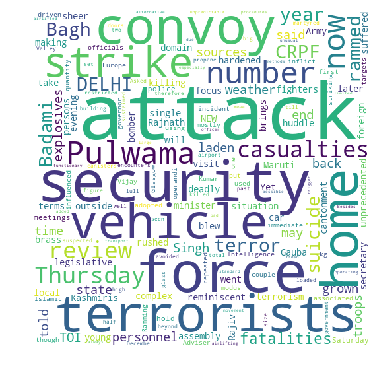

In [78]:

from wordcloud import WordCloud, STOPWORDS
import image
import urllib
import requests
import numpy as np
import matplotlib.pyplot as plt
  
#words = 'The deadly terror strike on a CRPF convoy in Pulwama is reminiscent of the Badami Bagh attack of 2000 when a young suicide bomber, all of 17, had rammed a Maruti 800 into the Army cantonment. A year later, terrorists blew up a car outside the J&K legislative assembly complex, killing 38 persons. Yet, the Pulwama attack is unprecedented in terms of sheer number of fatalities suffered by security personnel in J&K in a single strike, and also brings back focus on home-grown terrorism that is now making local Kashmiris take to suicide attacks, until now a domain of hardened foreign fighters. Home minister Rajnath Singh and home secretary Rajiv Gauba, who were out of Delhi at the time of the attack, rushed back on Thursday evening and went into a huddle with the security brass to review the situation in J&K. Singh will visit the state on Saturday and hold review meetings with security forces and J&K police. Intelligence officials told TOI that Thursday’s attack was not the first incident of a vehicle laden with explosives — sources put the quantity used at 200-300 kg — being driven to inflict immediate casualties on security personnel in J&K. Adviser to J&K governor K Vijay Kumar told TOI that the same modus operandi was adopted in Badami Bagh attack of 2000, and repeated in a couple of attacks in 2005. Ramming vehicles into targets is now associated mostly with Islamic State-influenced, home-grown terrorists in Europe, though one of the most striking attacks using explosives-laden vehicle was the Glasgow attack of 2000 when suspected terrorists rammed a vehicle loaded with propane canisters into the glass doors of the airport building. The Pulwama attack ends a lull in big terror strikes in the Valley, with the past two years having seen 470 terrorists killed in sustained encounters with security forces. Thursday’s casualties are half the total number of forces martyred in 2018. The 2019 force fatalities figure therefore is set to end well beyond those in 2018 (86 till December 2 ), 2017 (80) and 2016 (82). Asked if such high casualties could have been avoided had CRPF restricted the size of the convoy, a J&K government functionary said it was not unusual for forces to move in large convoys, especially after bad weather. Sources said the attack may trigger a fresh review of standard operating procedures for movement of convoys. “While there are alternative transport methods such as airlifting the troops, it may not always be possible due to unpredictable weather. Besides, only a limited number of troops can be airlifted at a time,” the officer added'
    
# This function takes in your text and your mask and generates a wordcloud. 
def generate_wordcloud(wordes):
    word_cloud = WordCloud(width = 512, height = 512, background_color='white', stopwords=STOPWORDS).generate(wordes)
    plt.figure(figsize=(5,5),facecolor = 'white', edgecolor='blue')
    plt.imshow(word_cloud)
    plt.axis('off')
    plt.tight_layout(pad=0)
    plt.show()
    
#Run the following to generate your wordcloud
generate_wordcloud(wordes)